In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 19

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 19)                209       
                                                                 
Total params: 1279 (5.00 KB)
Trainable params: 1279 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


33/43 [======================>.......] - ETA: 0s - loss: 2.9437 - accuracy: 0.0682
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 2s 13ms/step - loss: 2.9361 - accuracy: 0.0734 - val_loss: 2.8793 - val_accuracy: 0.1070
Epoch 2/1000
33/43 [======================>.......] - ETA: 0s - loss: 2.8714 - accuracy: 0.0928

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 6ms/step - loss: 2.8631 - accuracy: 0.0954 - val_loss: 2.8023 - val_accuracy: 0.1220
Epoch 3/1000
39/43 [==========================>...] - ETA: 0s - loss: 2.7787 - accuracy: 0.1424
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 5ms/step - loss: 2.7710 - accuracy: 0.1472 - val_loss: 2.6857 - val_accuracy: 0.2518
Epoch 4/1000
34/43 [======================>.......] - ETA: 0s - loss: 2.6753 - accuracy: 0.1926
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 6ms/step - loss: 2.6643 - accuracy: 0.2001 - val_loss: 2.5308 - val_accuracy: 0.3500
Epoch 5/1000
36/43 [========================>.....] - ETA: 0s - loss: 2.5255 - accuracy: 0.2550
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [=============

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.8336


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 144ms/step
[2.6349607e-01 3.9157844e-01 1.7382234e-07 1.3555605e-05 8.4086061e-02
 2.7000044e-02 5.3312053e-04 1.9345768e-11 1.7514039e-03 1.0319372e-01
 2.7392359e-04 1.7785897e-02 1.0837950e-05 8.9026571e-08 2.0747049e-05
 8.9480821e-03 8.5387453e-02 3.4744220e-04 1.5572898e-02]
1


# Confusion matrix

57/57 [==============================] - 0s 2ms/step


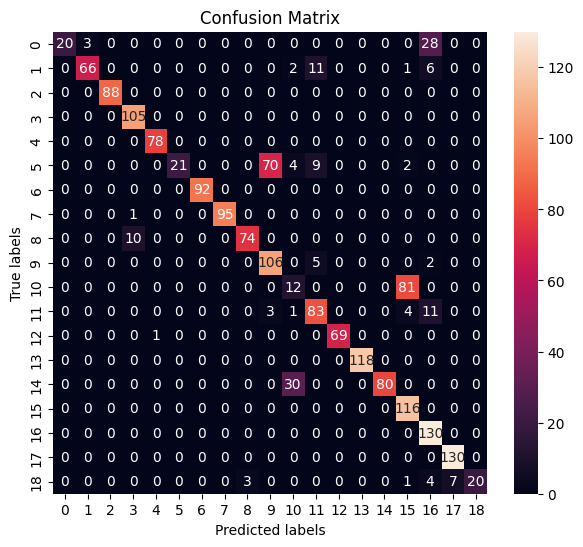

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        51
           1       0.96      0.77      0.85        86
           2       1.00      1.00      1.00        88
           3       0.91      1.00      0.95       105
           4       0.99      1.00      0.99        78
           5       1.00      0.20      0.33       106
           6       1.00      1.00      1.00        92
           7       1.00      0.99      0.99        96
           8       0.96      0.88      0.92        84
           9       0.59      0.94      0.73       113
          10       0.24      0.13      0.17        93
          11       0.77      0.81      0.79       102
          12       1.00      0.99      0.99        70
          13       1.00      1.00      1.00       118
          14       1.00      0.73      0.84       110
          15       0.57      1.00      0.72       116
          16       0.72      1.00      0.84       130
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmppzvi9_pu\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmppzvi9_pu\assets


7204

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 998 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.63496101e-01 3.91578436e-01 1.73822002e-07 1.35556293e-05
 8.40860978e-02 2.70000156e-02 5.33121056e-04 1.93457663e-11
 1.75140460e-03 1.03193700e-01 2.73923331e-04 1.77858863e-02
 1.08379272e-05 8.90264005e-08 2.07470457e-05 8.94807931e-03
 8.53874758e-02 3.47442867e-04 1.55729065e-02]
1
